**GRIP: The Sparks Foundation**

**Data Science and Business Analytics Intern**  
**Author: Tanveer Alam**  
**TASK 6: Prediction using Decision Tree**  
**Dataset: [Link](https://bit.ly/3kXTdox)**


In [26]:
#importin libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# path of csv file decleared and printed first 10 vaules from the Iris dataset*

Iris_df = pd.read_csv('C:\\Users\\tanve\\OneDrive\\Desktop\\Data science and business analytics file\\Iris.csv')
Iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# number of rows and columns
Iris_df.shape 

(150, 6)

In [4]:
Iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Unique values in each columns
for i in Iris_df.columns:
    print(i, "\t\t", len(Iris_df[i].unique()))

Id 		 150
SepalLengthCm 		 35
SepalWidthCm 		 23
PetalLengthCm 		 43
PetalWidthCm 		 22
Species 		 3


In [6]:
list_columns = Iris_df.columns
list_columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


**Calculate Mean, Standard Deviation, Min, Max, etc... for Continuous Variables**

In [7]:
Iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Visualize average, mean, standard deviation and Quartile Range')

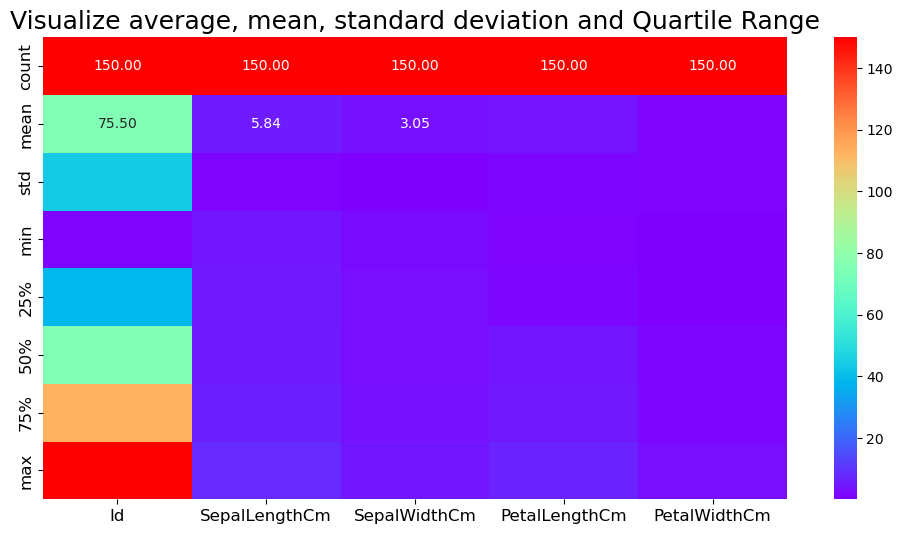

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(Iris_df.describe(), annot = True, fmt = '.2f', cmap = 'rainbow')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Visualize average, mean, standard deviation and Quartile Range", fontsize = 18)

**Relationship Between the data**

In [9]:
# Assuming 'species' is the non-numeric column
numeric_columns = Iris_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

Text(0.5, 1.0, 'Visualize mean, standard deviation and Quartile Range')

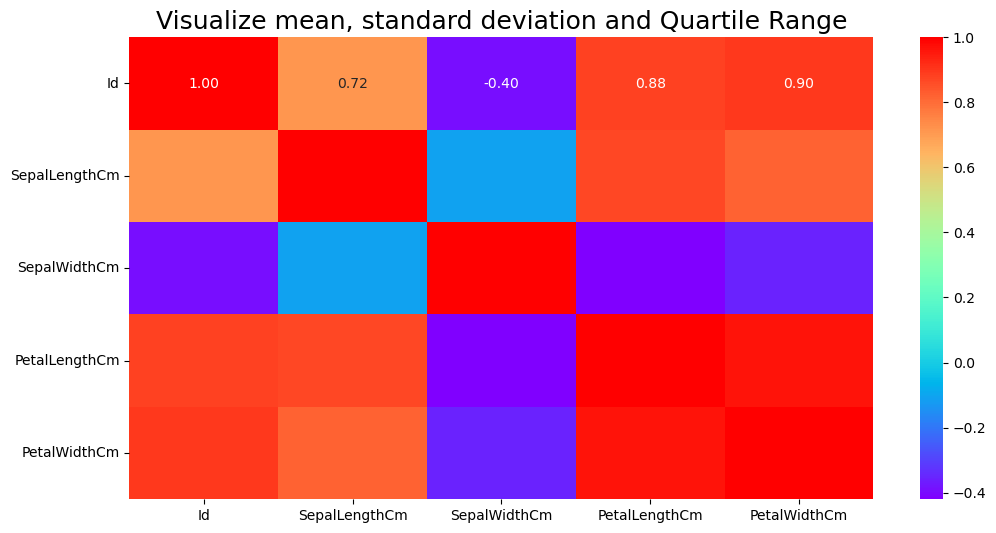

In [11]:
# Select only numeric columns
numeric_columns = Iris_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap with a rainbow color palette
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, cmap='rainbow', annot=True, fmt=".2f")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title("Visualize mean, standard deviation and Quartile Range", fontsize = 18)

**Check for Missing Values**

In [12]:
Iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Encoding catagorical Variable**

In [13]:
Iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [14]:
from sklearn import preprocessing
Iris_df['Species'] = preprocessing.LabelEncoder().fit_transform(Iris_df['Species'])

**Split Dependent and Independent Data**

In [15]:
X = Iris_df.iloc[:, 1:5].values
y = Iris_df.iloc[:, -1].values

**Split the Dataset into the Training Set and Test Set** 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**The Decision Tree Algorithm***


**Training the Decision Tree Classification Model**

In [28]:
from sklearn import tree

classifier_tree = tree.DecisionTreeClassifier()
classifier_tree = classifier_tree.fit(X_train,y_train)

# Text graph representation
text_representation = tree.export_text(classifier_tree)
print(text_representation)

|--- feature_3 <= -0.58
|   |--- class: 0
|--- feature_3 >  -0.58
|   |--- feature_3 <= 0.70
|   |   |--- feature_2 <= 0.71
|   |   |   |--- feature_0 <= -1.00
|   |   |   |   |--- feature_2 <= 0.07
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.07
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  -1.00
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.71
|   |   |   |--- class: 2
|   |--- feature_3 >  0.70
|   |   |--- feature_2 <= 0.60
|   |   |   |--- feature_0 <= 0.08
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.08
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  0.60
|   |   |   |--- class: 2



[Text(0.4444444444444444, 0.9166666666666666, 'x[2] <= -0.783\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5555555555555556, 0.75, 'x[3] <= 0.701\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[2] <= 0.711\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[3] <= 0.573\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.3333333333333333, 0.25, 'x[1] <= -0.746\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4444444444444444, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.777777777777777

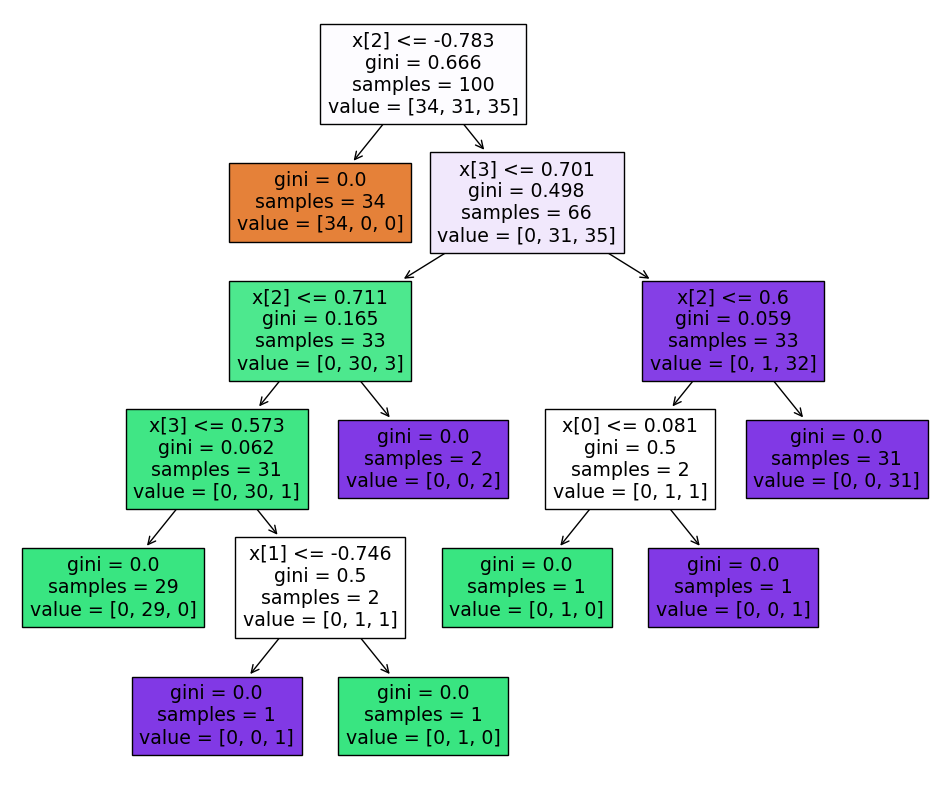

In [19]:
# Decision tree plot 

plt.figure(figsize = (12,10))
tree.plot_tree(classifier_tree, filled = True, impurity = True)

**Making predictions OR Predict the Test set**

In [20]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

y_pred = classifier.predict(X_test)
y_pred
print("Accuracy score: ", np.mean(y_pred == y_test))

Accuracy score:  0.96


**Accuracy of The Model**

In [21]:
print("Accuracy score: ", np.mean(y_pred == y_test))

Accuracy score:  0.96


**Making the confusion Matrix**

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]


**Plot Confusion Metrix**

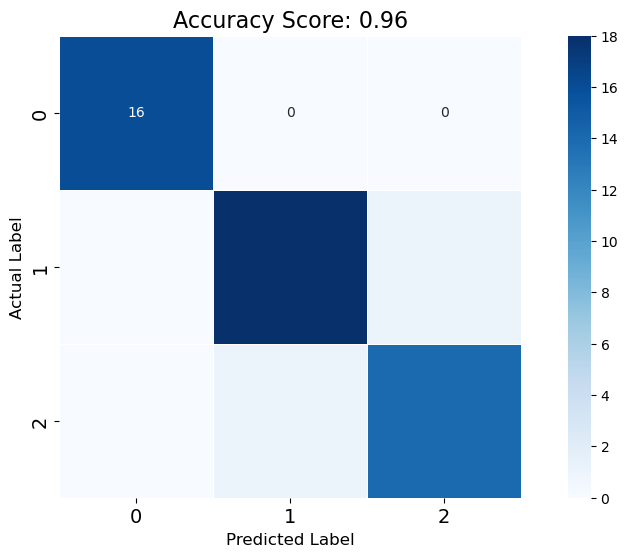

In [23]:
# Assuming y_pred and y_test are defined and cm is calculated
cm = confusion_matrix(y_test, y_pred)
score = np.mean(y_pred == y_test)

plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, fmt='.0f', linewidths=0.5, square=True, cmap='Blues')
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.title("Accuracy Score: {:.2f}".format(score), size=16)  # Corrected title formatting
plt.tick_params(labelsize=14)
plt.show()

In [24]:
cm_accuracy =accuracy_score(y_test, y_pred)
print("Accuracy of model: ", cm_accuracy)

Accuracy of model:  0.96


**Classification Report**

In [25]:
from sklearn import metrics

print(metrics.classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



**CONCLUSION**

This classifier model can predict the Species of the flower with **96%** accuracy.
